<a href="https://colab.research.google.com/github/samratchakraborty422000/AirBnB-STOCKS-EDA-AND-FEATURE-ENGINEERING/blob/main/AirBnB_STOCK_EDA_AND_FEATURE_ENGINEERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING LIBRARIES


In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')



# IMPORING DATASET

In [122]:
df = pd.read_csv('/content/ABNB.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
1,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
2,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
3,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
4,2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700


# PROPERTIES OF THE DATASET

In [123]:
#CHECKING SHAPE OF THE DATASET
df.shape

(454, 7)

In [124]:
# CHECKING STATISTICAL MEASURES OF THE DATASET
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,454.000000,454.000000,454.000000,454.000000,454.000000,4.540000e+02
mean,152.735925,156.465595,148.969855,152.729185,152.729185,6.690328e+06
std,28.340932,29.107813,27.490223,28.226659,28.226659,4.417387e+06
min,88.879997,91.459999,86.709999,89.080002,89.080002,1.995400e+06
25%,136.821507,139.842495,132.920002,135.955002,135.955002,4.114375e+06
50%,154.932495,159.099998,151.230004,155.654999,155.654999,5.450000e+06
75%,172.556507,175.974998,168.595005,171.744996,171.744996,7.631375e+06
max,216.240005,219.940002,209.089996,216.839996,216.839996,3.975500e+07


In [125]:
# OVERVIEW OF THE COLUMNS AND ITS DATATYPES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       454 non-null    object 
 1   Open       454 non-null    float64
 2   High       454 non-null    float64
 3   Low        454 non-null    float64
 4   Close      454 non-null    float64
 5   Adj Close  454 non-null    float64
 6   Volume     454 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 25.0+ KB


# CHECKING FOR NULL VALUES

In [126]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

LUCKILY WE DO NOT HAVE ANY NULL VALUES

# PARTITIONING COLUMNS INTO SUB CATEGORIES

* ALL COLUMNS

In [127]:
columns=list(df.columns)
columns

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

* NUMERICAL COLUMNS

In [128]:
numerical_columns=[feature for feature in columns if df[feature].dtype != 'object']
numerical_columns

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

* CATEGORICAL COLUMNS

In [129]:
categorical_columns=[feature for feature in columns if df[feature].dtype == 'object']
categorical_columns

['Date']

# EXPLORATORY DATA ANALYSIS

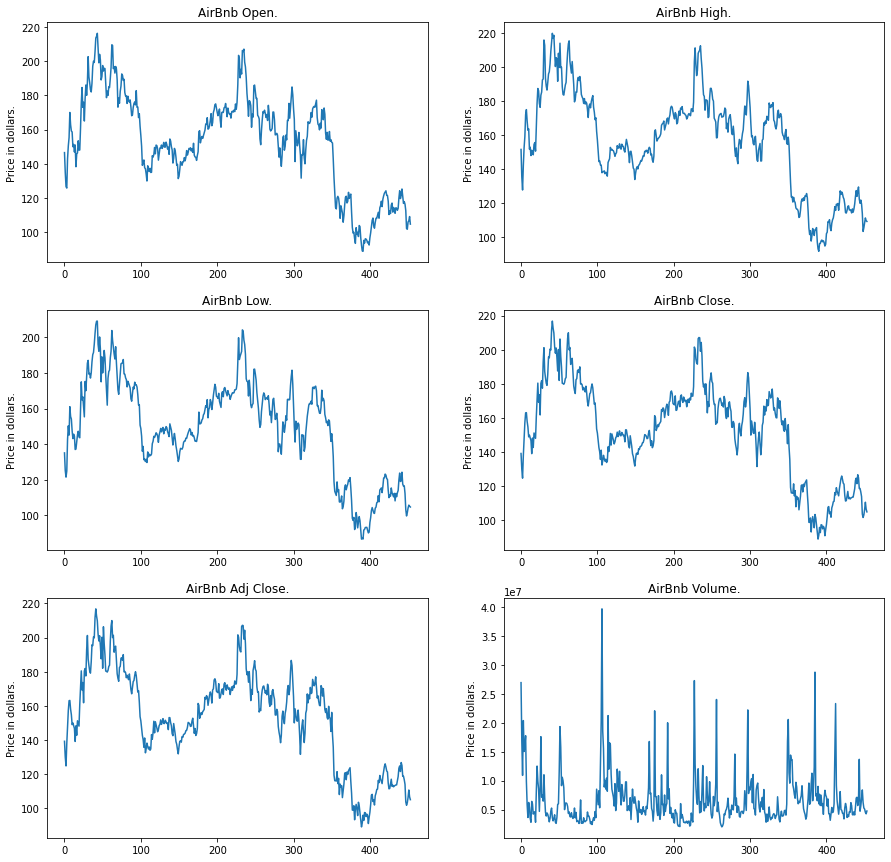

In [130]:
plt.figure(figsize=(15,15))
for i, column in enumerate(numerical_columns):
    plt.subplot(3,2,i+1)
    plt.plot(df[column])
    plt.title(f'AirBnb {column}.')
    plt.ylabel('Price in dollars.')
plt.show()

In [131]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
1,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
2,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
3,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
4,2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700


If we observe carefully we can see that the data in the ‘Close’ column and that  in the ‘Adj Close’ column is the same let’s check whether this is the case with each row or not.

In [132]:
df[df['Close'] == df['Adj Close']].shape

(454, 7)

So it maches with the original shape of the dataset.From here we can conclude that all the rows of columns ‘Close’ and ‘Adj Close’ have the same data. So, having redundant data in the dataset is not going to help so, we’ll drop this column before further analysis.

In [133]:
df = df.drop(['Adj Close'], axis=1)

In [134]:
# NOW CHECK THE UPDATED DATA
df.head()

,Date,Open,High,Low,Close,Volume
0,2020-12-11,146.550003,151.500000,135.100006,139.250000,26980800
1,2020-12-14,135.000000,135.300003,125.160004,130.000000,16966100
2,2020-12-15,126.690002,127.599998,121.500000,124.800003,10914400
3,2020-12-16,125.830002,142.000000,124.910004,137.990005,20409600
4,2020-12-17,143.000000,152.449997,142.669998,147.050003,15054700


NOW WE WILL UPDATE OUR NUMERICAL COLUMS LIST

In [135]:
numerical_columns.remove("Adj Close")
print(numerical_columns)

['Open', 'High', 'Low', 'Close', 'Volume']


Now we check how the Data is distributed.

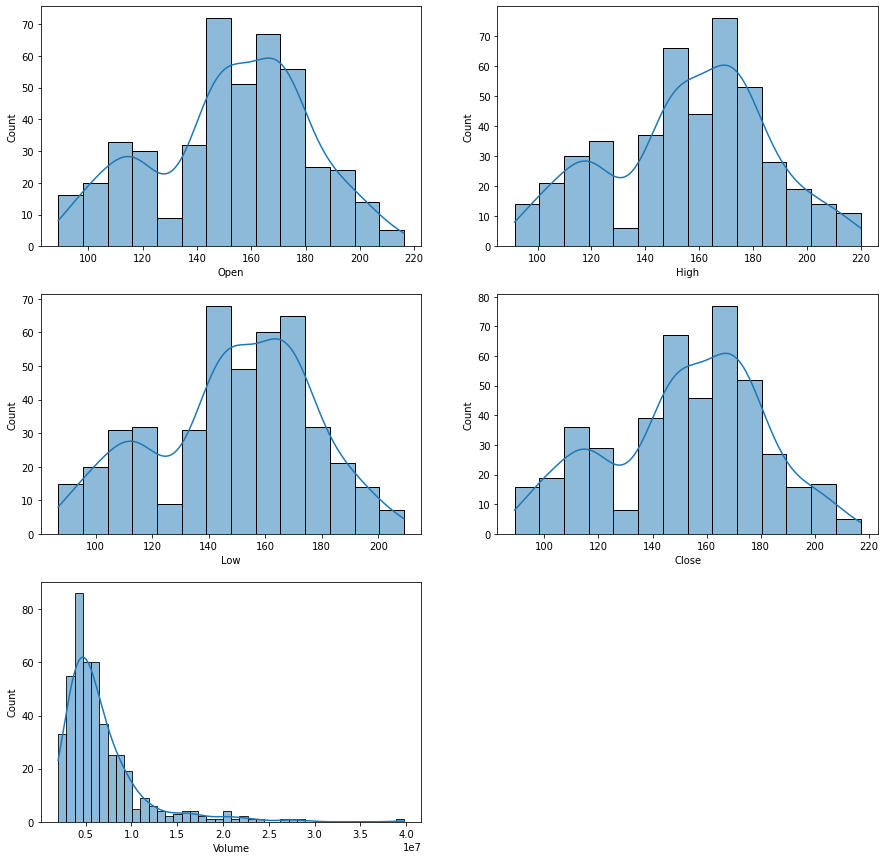

In [136]:
plt.figure(figsize=(15,15))
for i, column in enumerate(numerical_columns):
    plt.subplot(3,2,i+1)
    sns.histplot(df[column],kde=True)
plt.show()

we can see two peaks which means the data has varied significantly in two regions. And the Volume data is right-skewed as the tail is on the right side.

## CORRELATION MATRIX

<AxesSubplot:>

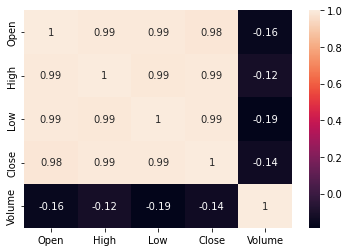

In [137]:
sns.heatmap(df.corr(), annot=True)

From the above heatmap, we can say that there is a high correlation between OHLC that is pretty obvious

# VISUALIZING THE OUTLIERS

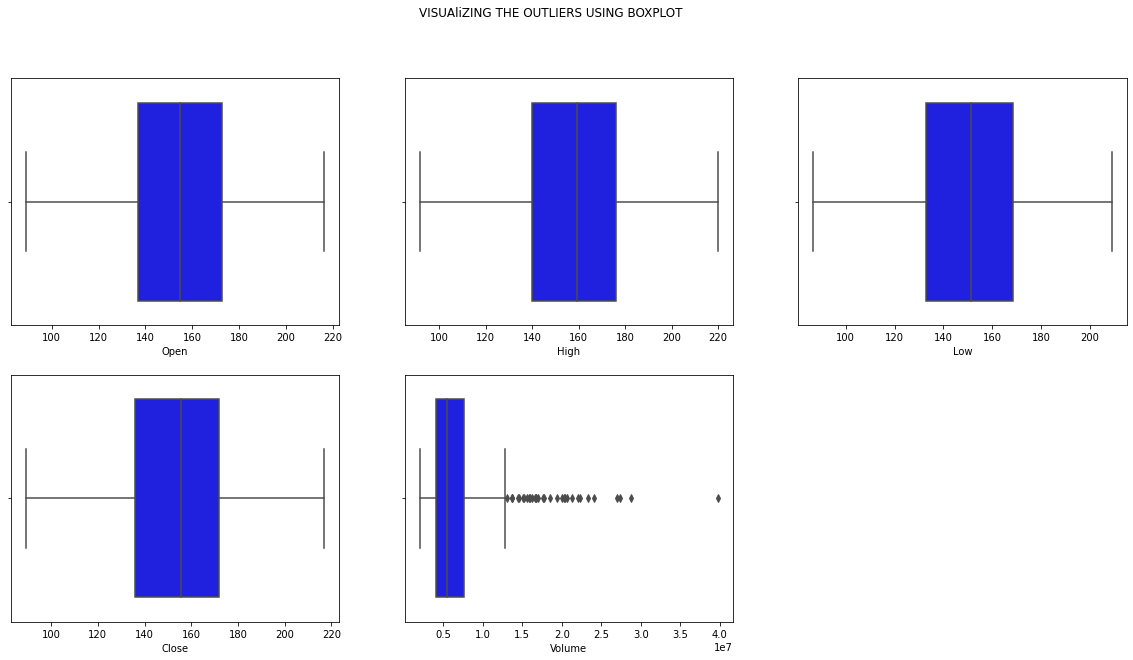

In [138]:
plt.subplots(figsize=(20,10))
plt.suptitle('VISUAliZING THE OUTLIERS USING BOXPLOT')
for i, column in enumerate(numerical_columns):
    plt.subplot(2,3,i+1)
    sns.boxplot(df[column],color='b')
plt.show()


From the above boxplots, we can conclude that only volume data contains outliers in it but the data in the rest of the columns are free from any outlier.

# FEATURE ENGINEERING

Feature Engineering helps to derive some valuable features from the existing ones. These extra features sometimes help in increasing the performance of the model significantly and certainly help to gain deeper insights into the data.

In [139]:
# CREATING DAY,MONTH, YEAR COLUMNS USING DATE COLUMN
splitted = df['Date'].str.split('-',expand=True)
df['Day'] = splitted[2]
df['Month'] = splitted[1].astype('int')
df['Year'] = splitted[0].astype('int')
df.head()

,Date,Open,High,Low,Close,Volume,Day,Month,Year
0,2020-12-11,146.550003,151.500000,135.100006,139.250000,26980800,11,12,2020
1,2020-12-14,135.000000,135.300003,125.160004,130.000000,16966100,14,12,2020
2,2020-12-15,126.690002,127.599998,121.500000,124.800003,10914400,15,12,2020
3,2020-12-16,125.830002,142.000000,124.910004,137.990005,20409600,16,12,2020
4,2020-12-17,143.000000,152.449997,142.669998,147.050003,15054700,17,12,2020


Now we creat a column which will check if the Quaters of the years is end or not.

In [140]:
df['is_quarter_end'] = np.where(df['Month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,Day,Month,Year,is_quarter_end
0,2020-12-11,146.550003,151.500000,135.100006,139.250000,26980800,11,12,2020,1
1,2020-12-14,135.000000,135.300003,125.160004,130.000000,16966100,14,12,2020,1
2,2020-12-15,126.690002,127.599998,121.500000,124.800003,10914400,15,12,2020,1
3,2020-12-16,125.830002,142.000000,124.910004,137.990005,20409600,16,12,2020,1
4,2020-12-17,143.000000,152.449997,142.669998,147.050003,15054700,17,12,2020,1


A quarter is defined as a group of three months. Every company prepares its quarterly results and publishes them publicly so, that people can analyze the company’s performance. These quarterly results affect the stock prices heavily which is why we have added this feature.

Since The price columns are free from outliers, we will calculate the mean and visualize the prices with respect to the Years.  

* CHECING THE PRICES YEARWISE

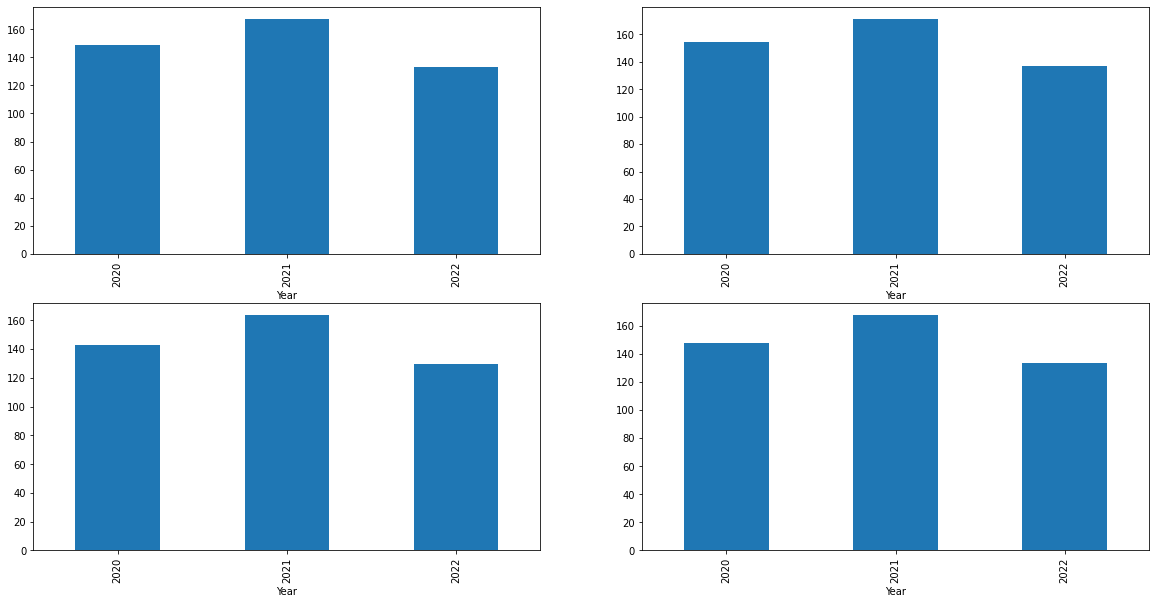

In [141]:
data_grouped = df.groupby('Year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()

Here we can conclude that the stock prices had increased in 2021 with respect to 2020 and then decreased by the year 2022 with respect to 2021. 

* CHECING THE PRICES QUATERLY

In [142]:
df.groupby('is_quarter_end').mean()


,Open,High,Low,Close,Volume,Month,Year
is_quarter_end,,,,,,,
0,154.043449,157.771268,150.184352,153.964634,6.510535e+06,5.477352,2021.428571
1,150.488863,154.221712,146.882665,150.605988,6.999314e+06,7.221557,2021.305389


Here are some of the important observations of the above-grouped data:

* Prices are lower in the months which are quarter end as compared to that of the non-quarter end months.
* The volume of trades is higher in the months which are quarter end.

Text(0.5, 1.0, 'Yearwise Open vs Close price')

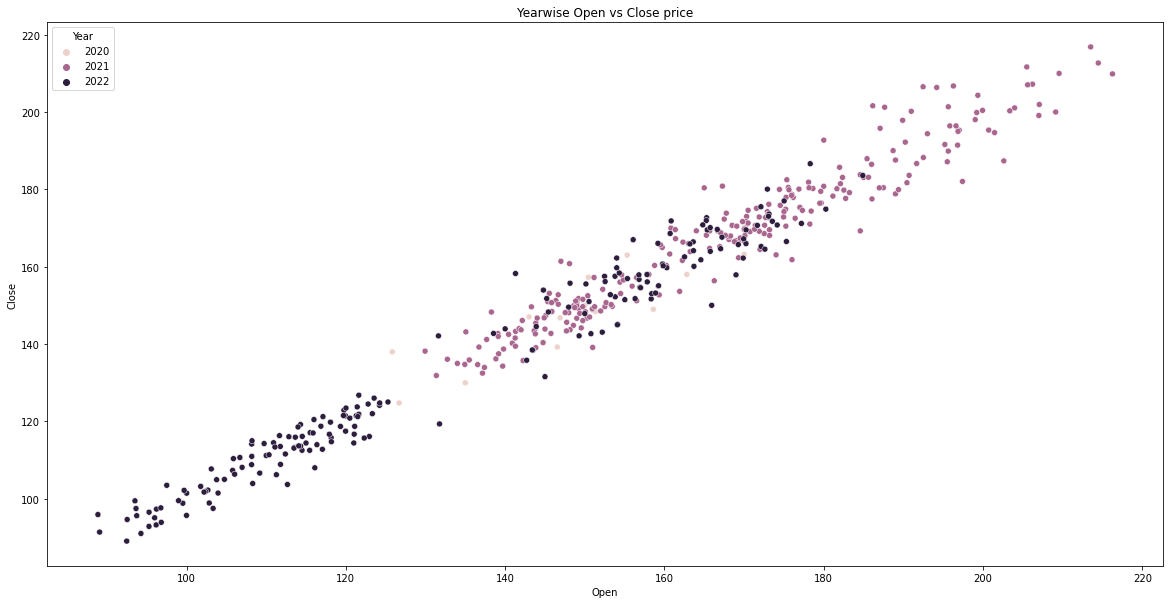

In [143]:
fig, ax = plt.subplots(figsize=(20, 10))
p1 = sns.scatterplot(data=df,x="Open",y="Close",hue='Year',ax=ax)
plt.title("Yearwise Open vs Close price")

Text(0.5, 1.0, 'Monthwise Open vs Close price')

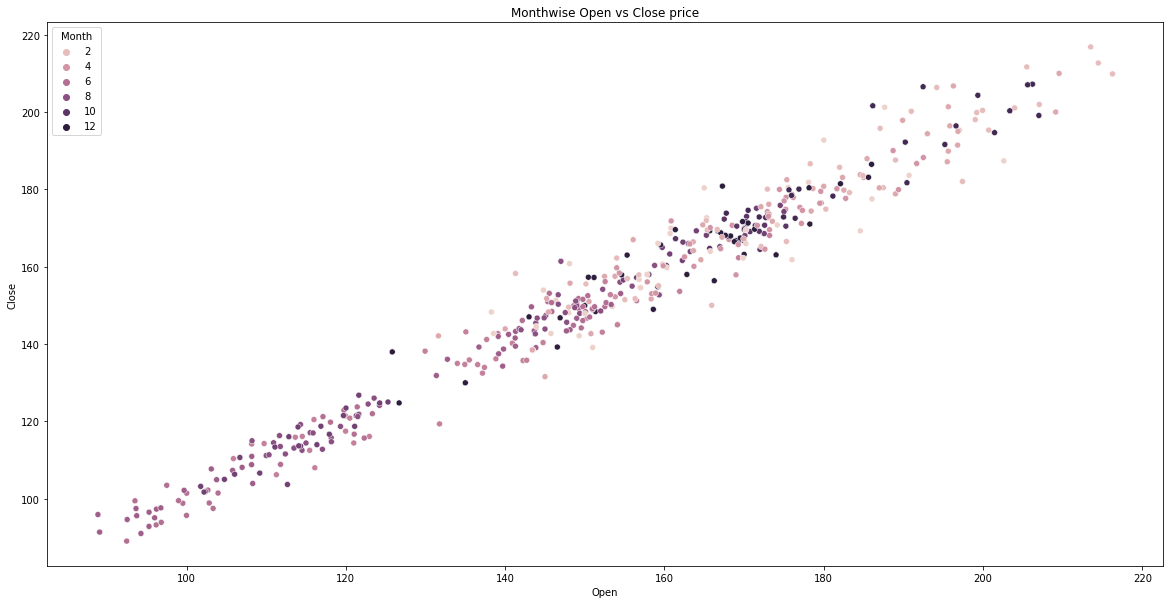

In [144]:
fig, ax = plt.subplots(figsize=(20, 10))
p1 = sns.scatterplot(data=df,x="Open",y="Close",hue='Month',ax=ax)
plt.title("Monthwise Open vs Close price")

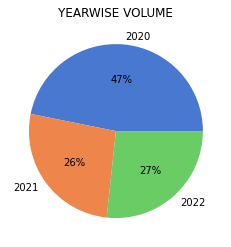

In [145]:
x1=df.groupby('Year')["Volume"].mean()             #gettong the mean yearwise
years=df['Year'].unique()        #listing the unique years

#setting the color 
palette_color = sns.color_palette('muted')

# plotting data on chart
plt.title('YEARWISE VOLUME')
plt.pie(x1, labels=years, colors=palette_color, autopct='%.0f%%')

# displaying chart
plt.show()